# Instalando e importando as bibliotecas necessárias

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install pmdarima
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima, arima
from pmdarima.utils import tsdisplay, autocorr_plot, decomposed_plot, plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from prophet import Prophet

In [38]:
df = pd.read_csv('/content/Ipeadata.csv', encoding='utf-8', delimiter='\t')  # Usando '\t' para separar por tabulação

print(df.head()) # Exibindo as primeiras linhas do DataFrame

       Data - Preco - petroleo bruto - Brent (FOB)
0  2024-09-23                                7,495
1  2024-09-20                                7,596
2  2024-09-19                                7,593
3  2024-09-18                                7,452
4  2024-09-17                                7,455


In [39]:
print(df.columns)

Index(['Data -', 'Preco - petroleo bruto - Brent (FOB)'], dtype='object')


In [40]:
df.rename(columns={'Preco - petroleo bruto - Brent (FOB)': 'preco'}, inplace=True)

In [41]:
df['preco'] = df['preco'].str.replace(',', '.').astype(float) # Substituindo a vírgula por ponto na coluna de preço

print(df.head()) # Exibindo as primeiras linhas para verificar a conversão

       Data -  preco
0  2024-09-23  7.495
1  2024-09-20  7.596
2  2024-09-19  7.593
3  2024-09-18  7.452
4  2024-09-17  7.455


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data -  11262 non-null  object 
 1   preco   11262 non-null  float64
dtypes: float64(1), object(1)
memory usage: 176.1+ KB


# Tratamento dos dados

In [43]:
df.rename(columns={'Data -': 'data', 'Preco - petroleo bruto - Brent (FOB)': 'preco'}, inplace=True)

# Visualização dos Dados

Variação do Preço do Petróleo Brent

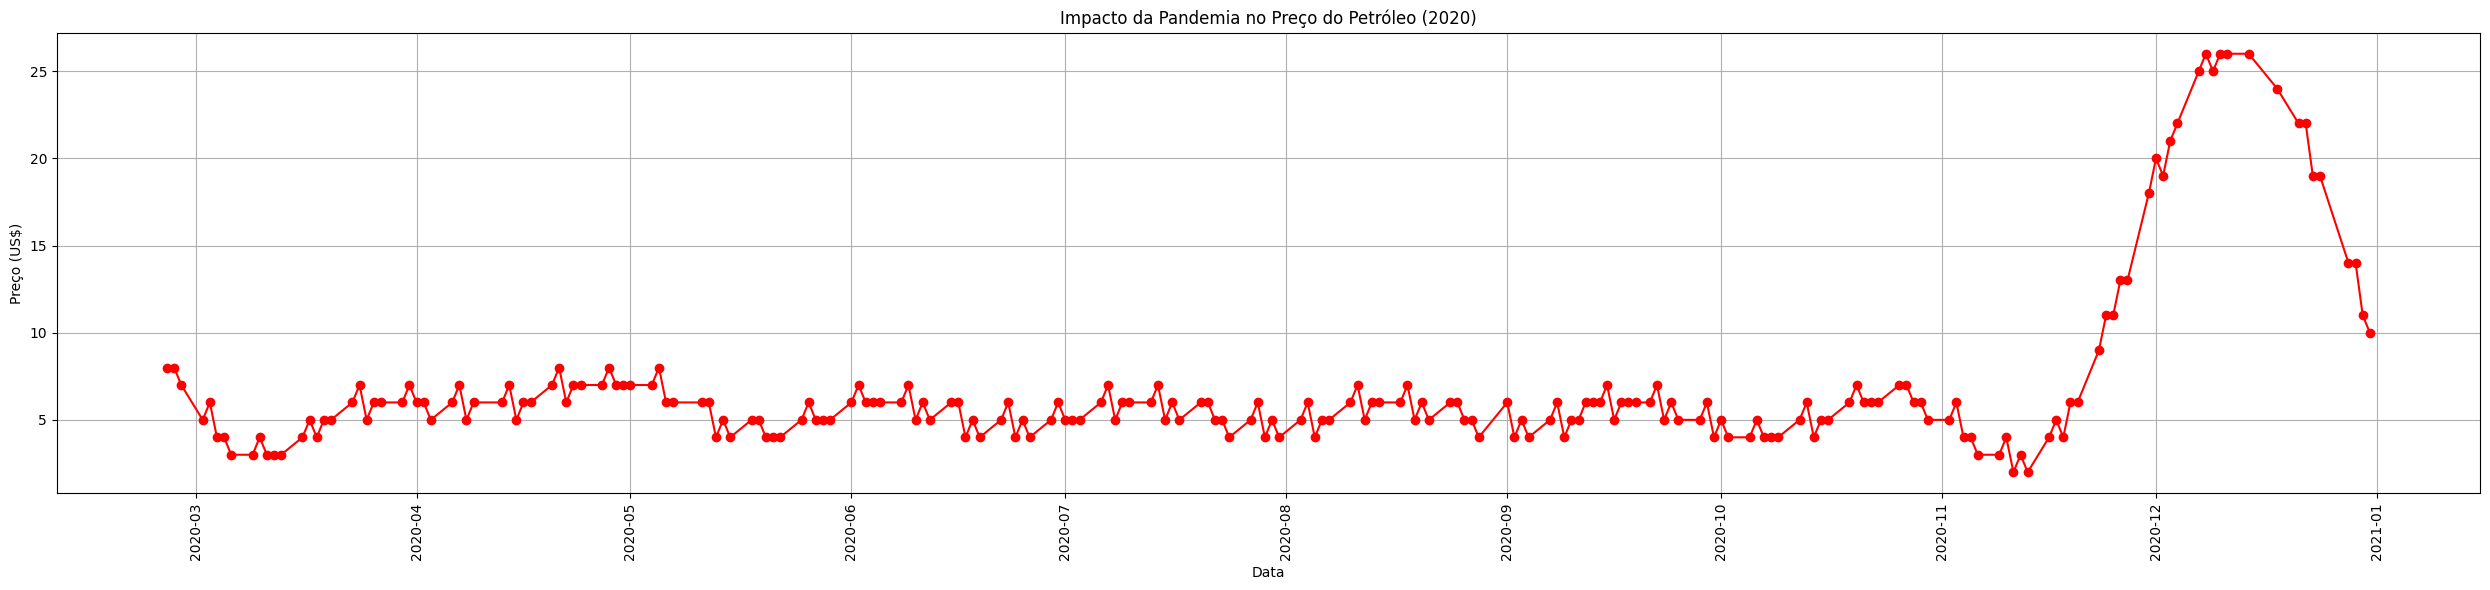

In [73]:
import matplotlib.pyplot as plt

df_covid = df[(df['data'] >= '2020-02-26') & (df['data'] <= '2020-12-31')]
# Assigning the figure to the variable fig
plt.figure(figsize=(25, 6))
plt.plot(df_covid['data'], df_covid['preco'], marker='o', color='red', linestyle='-')
plt.title('Impacto da Pandemia no Preço do Petróleo (2020)')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Tensões Geopolíticas no Oriente Médio (2020)

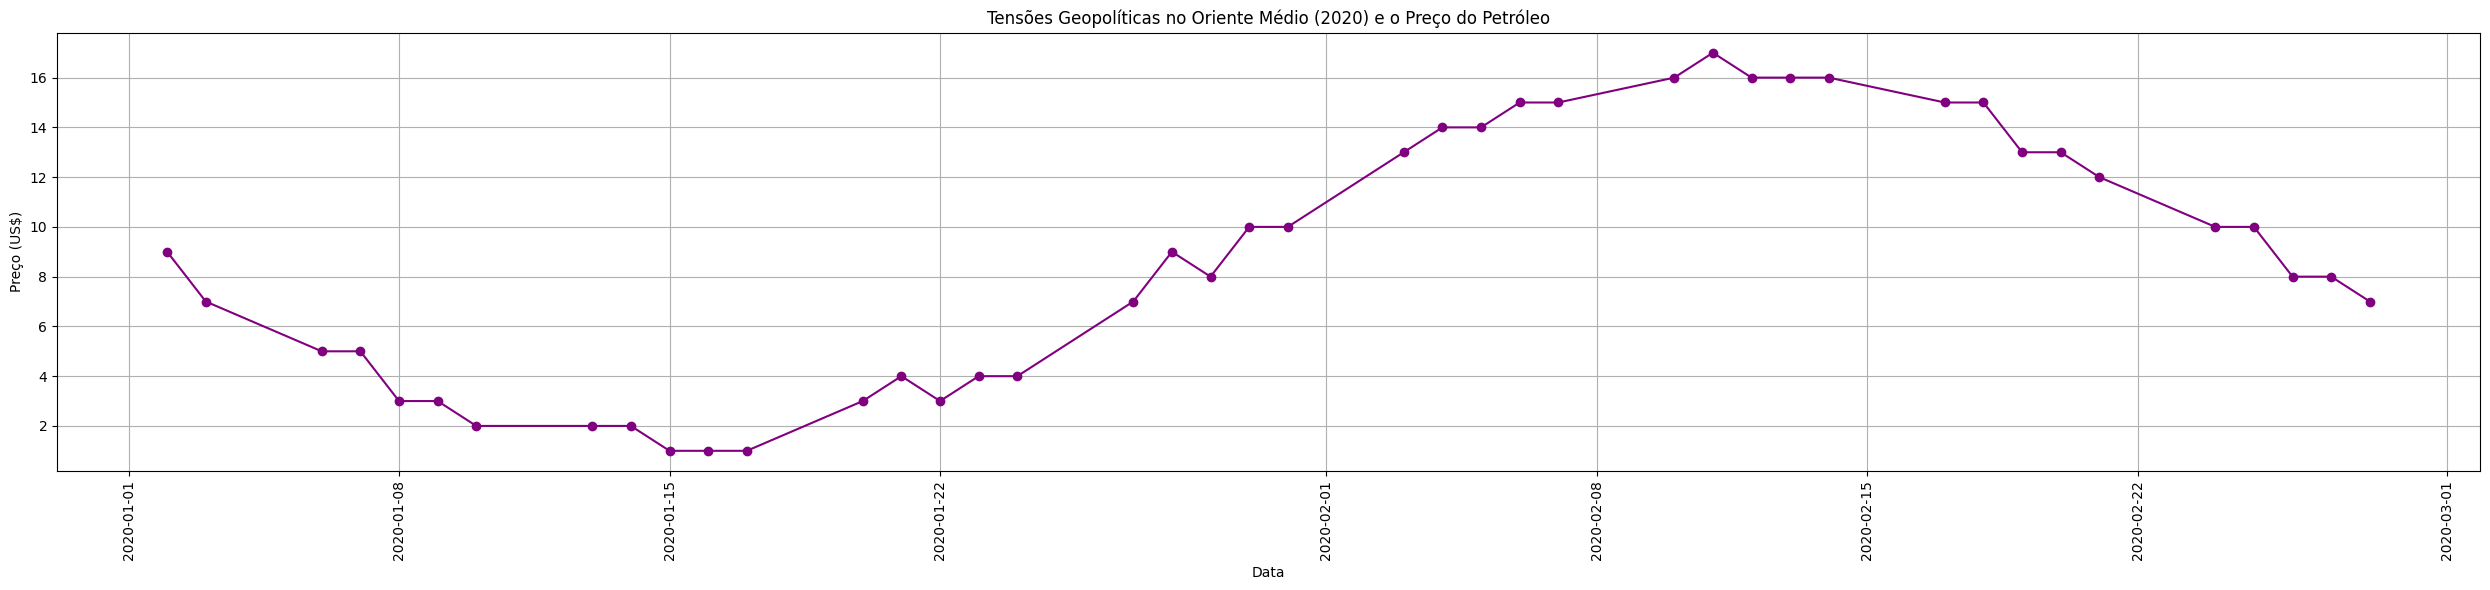

In [74]:
df_geopolitica = df[(df['data'] >= '2020-01-01') & (df['data'] <= '2020-03-01')]
plt.figure(figsize=(25, 6))
plt.plot(df_geopolitica['data'], df_geopolitica['preco'], marker='o', color='purple', linestyle='-')
plt.title('Tensões Geopolíticas no Oriente Médio (2020) e o Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Crise Econômica de 2008

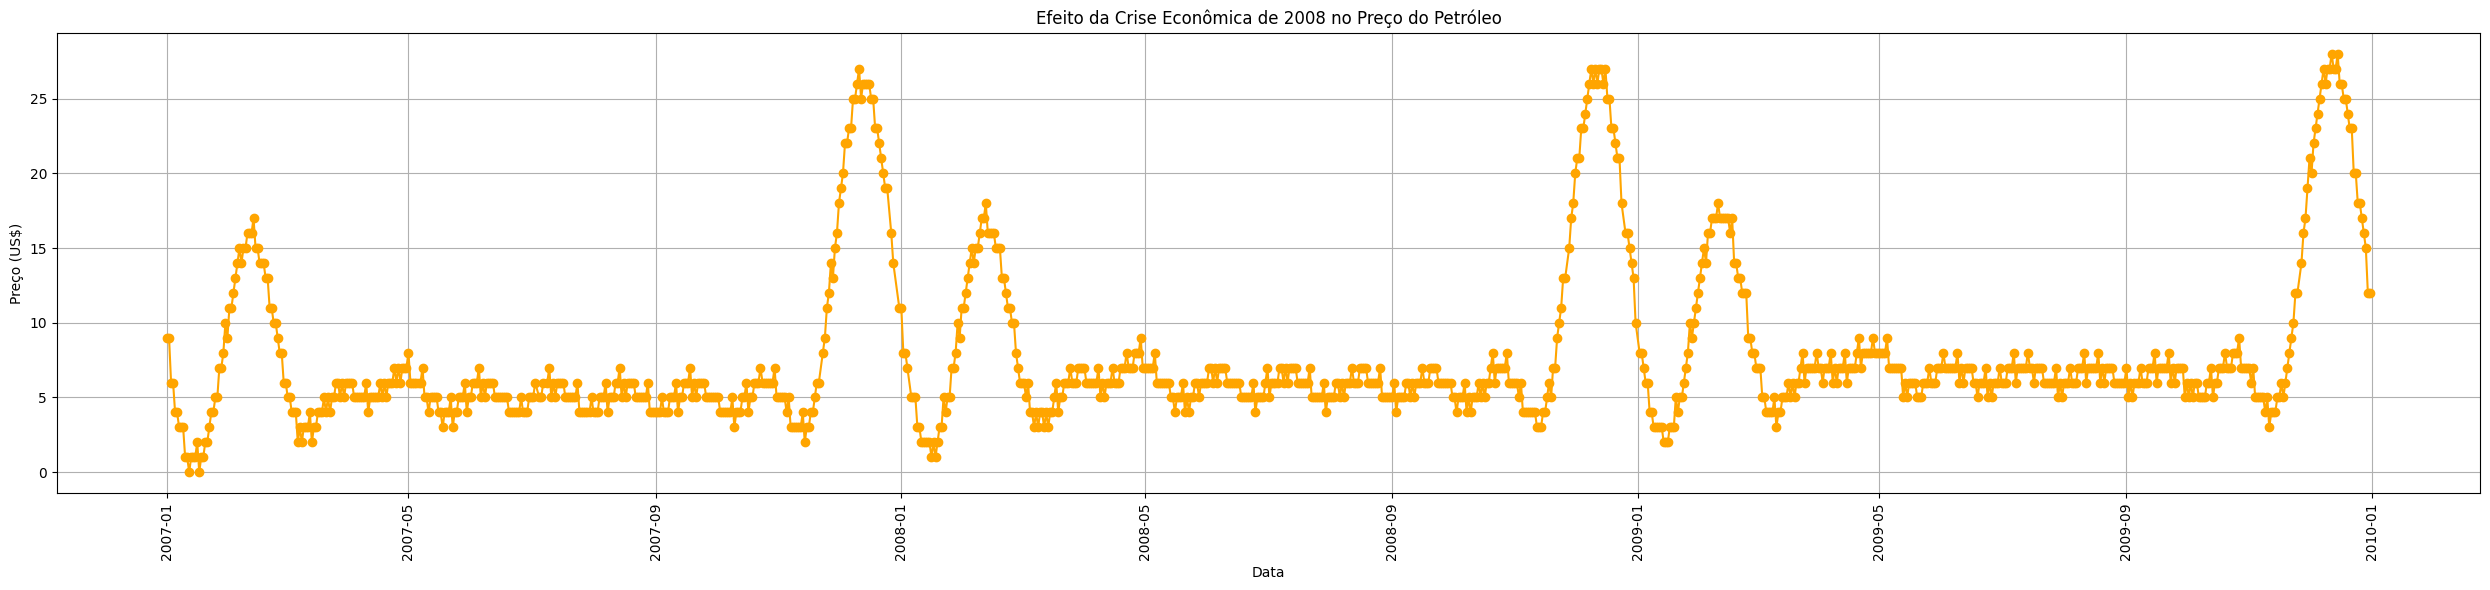

In [75]:
df_2008 = df[(df['data'] >= '2007-01-01') & (df['data'] <= '2009-12-31')]
plt.figure(figsize=(25, 6))
plt.plot(df_2008['data'], df_2008['preco'], marker='o', color='orange', linestyle='-')
plt.title('Efeito da Crise Econômica de 2008 no Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Acordo da OPEP e Cortes na Produção (2016) - (Organização dos Países Exportadores de Petróleo)

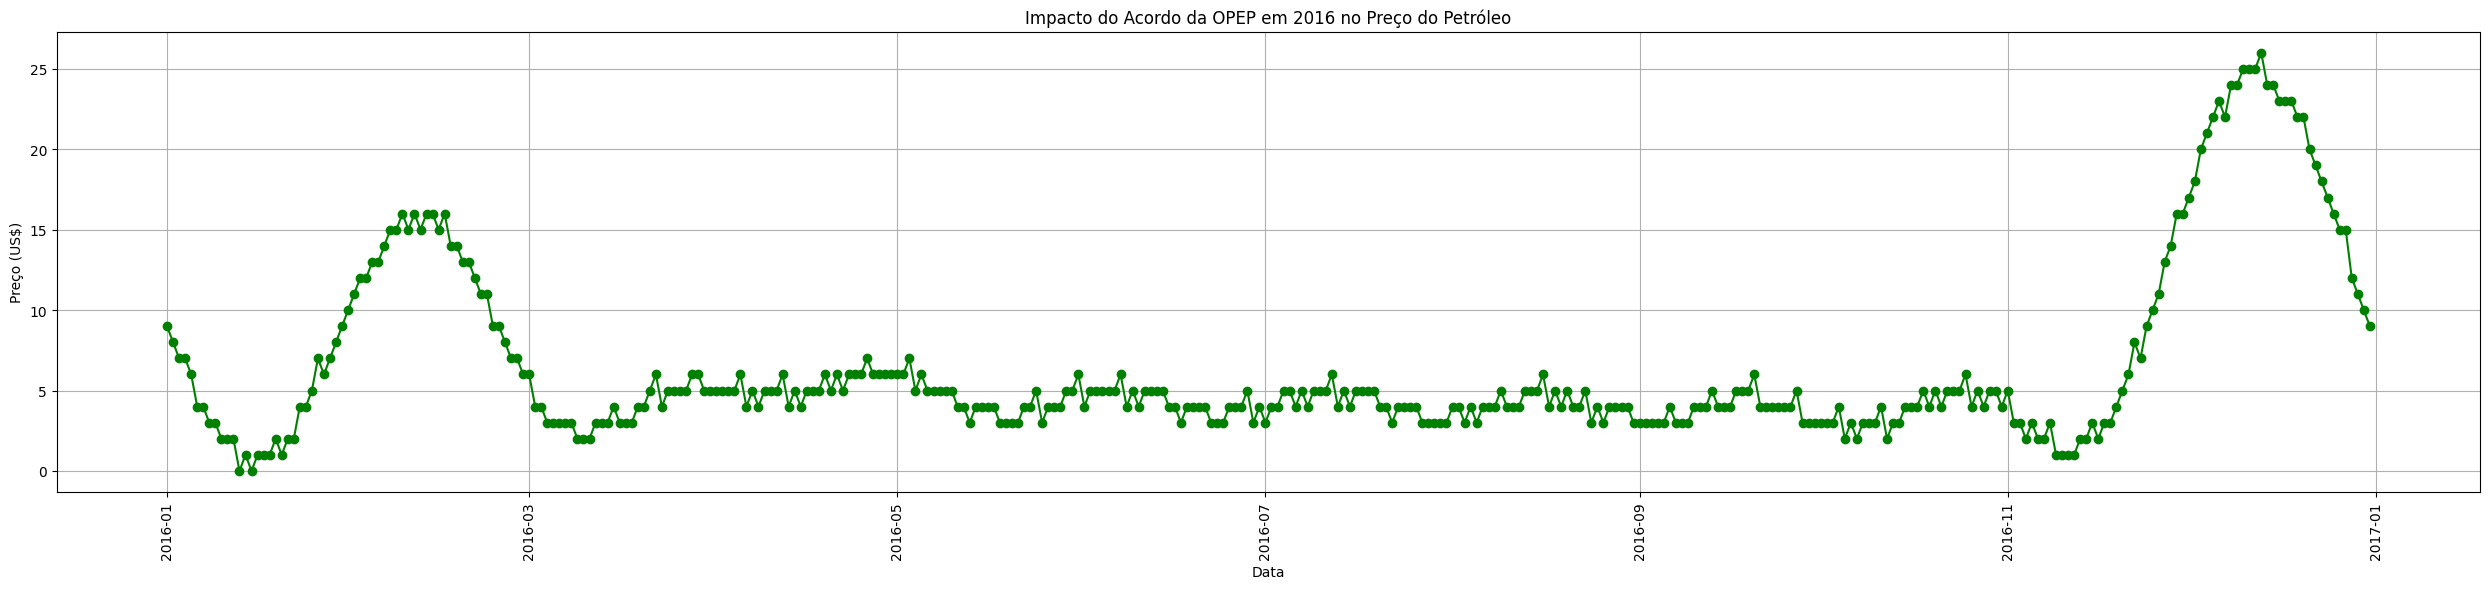

In [76]:
df_2016 = df[(df['data'] >= '2016-01-01') & (df['data'] <= '2016-12-31')]
plt.figure(figsize=(25, 6))
plt.plot(df_2016['data'], df_2016['preco'], marker='o', color='green', linestyle='-')
plt.title('Impacto do Acordo da OPEP em 2016 no Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço (US$)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Preparando Dados para o prophet

In [48]:
# Preparar os dados para o Prophet
df = df.reset_index().rename(columns={'Data': 'ds', 'Preco - petroleo bruto - Brent (FOB)': 'y'})

print(f"O dataframe tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataframe tem 11262 linhas e 3 colunas


In [49]:
## Visualizando as linhas recentes, para entender a data final da base:
df.head()

,index,data,preco
0,0,2024-09-23,7.495
1,1,2024-09-20,7.596
2,2,2024-09-19,7.593
3,3,2024-09-18,7.452
4,4,2024-09-17,7.455


In [50]:
## Visualizando as linhas mais antigas, para entender a data inicial da base:
df.tail()

,index,data,preco
11257,11257,1987-05-26,1.863
11258,11258,1987-05-25,1.860
11259,11259,1987-05-22,1.855
11260,11260,1987-05-21,1.845
11261,11261,1987-05-20,1.863


In [51]:
## Não há valores nulos na base, portanto vamos para o próximo passo, selecionar apenas as colunas que iremos usar:
df=df[['data', 'preco']]

In [52]:
df

,data,preco
0,2024-09-23,7.495
1,2024-09-20,7.596
2,2024-09-19,7.593
3,2024-09-18,7.452
4,2024-09-17,7.455
...,...,...
11257,1987-05-26,1.863
11258,1987-05-25,1.860
11259,1987-05-22,1.855
11260,1987-05-21,1.845


##Estrutura do Dado:
As datas precisam estar em formato reconhecível (dia/mês/ano) e valores precisam representar preço de fechamento da bolsa. Caso exista formatos inconsistentes isso pode ser um impeditivo para as análises

In [53]:
# Convertendo a coluna para Data
df['data'] = pd.to_datetime(df['data'], format="%Y-%m-%d") # Changed the format to "%Y-%m-%d" to match the actual date format in the column.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    11262 non-null  datetime64[ns]
 1   preco   11262 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 176.1 KB


In [55]:
# Transformando a coluna Ano para Index
df.set_index('data', inplace=True)

In [56]:
df

,preco
data,
2024-09-23,7.495
2024-09-20,7.596
2024-09-19,7.593
2024-09-18,7.452
2024-09-17,7.455
...,...
1987-05-26,1.863
1987-05-25,1.860
1987-05-22,1.855


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11262 entries, 2024-09-23 to 1987-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preco   11262 non-null  float64
dtypes: float64(1)
memory usage: 176.0 KB


In [58]:
df['preco'] = df['preco'].astype(float)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11262 entries, 2024-09-23 to 1987-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preco   11262 non-null  float64
dtypes: float64(1)
memory usage: 176.0 KB


### Iniciar preparação para previsão dos dados:

In [60]:
# Preparar os dados para o Prophet
df_prophet = df.reset_index().rename(columns={'data': 'ds', 'preco': 'y'})

In [61]:
print(df.columns)

Index(['preco'], dtype='object')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptk537c6s/rh9yi8qc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptk537c6s/xj6iqbx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13274', 'data', 'file=/tmp/tmptk537c6s/rh9yi8qc.json', 'init=/tmp/tmptk537c6s/xj6iqbx0.json', 'output', 'file=/tmp/tmptk537c6s/prophet_model8c84koi3/prophet_model-20241025001509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:15:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:15:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


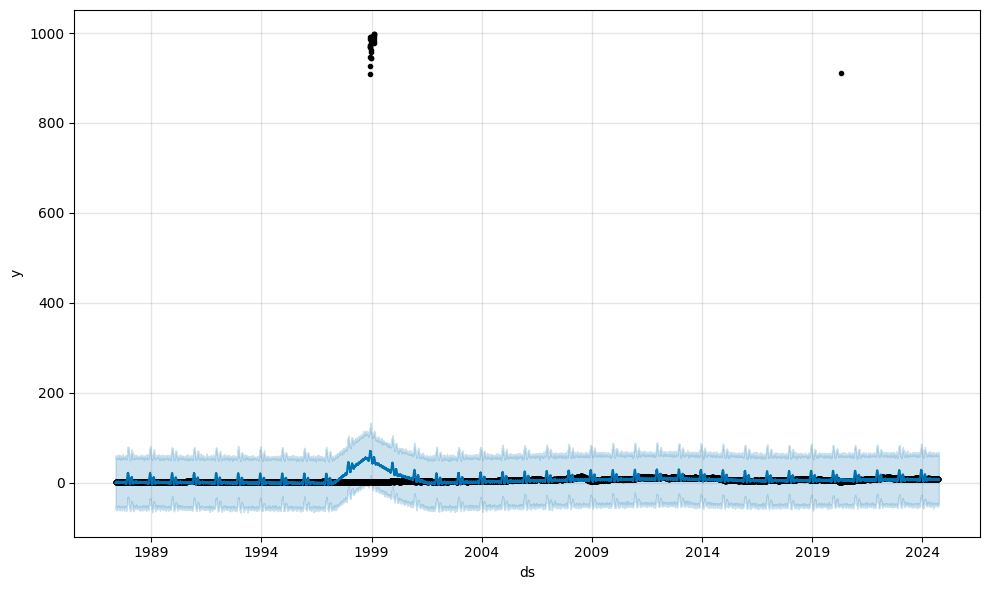

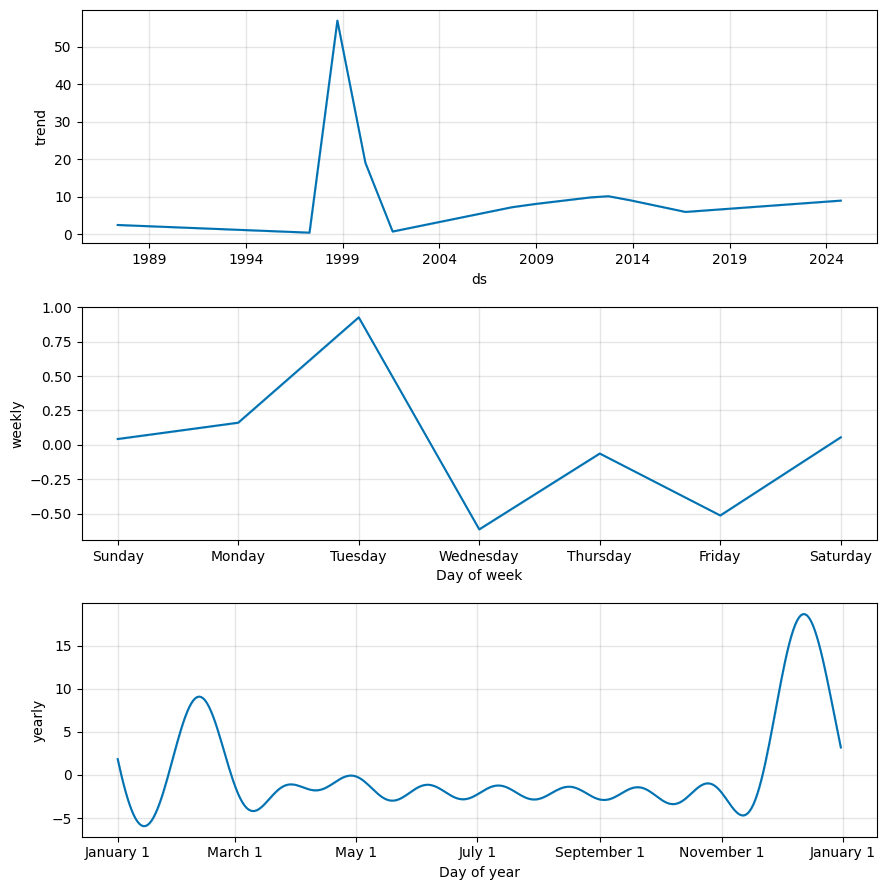

In [62]:
# Ajustar o modelo Prophet
model = Prophet()
model.fit(df_prophet)

# Criar DataFrame para datas futuras e fazer previsões
future = model.make_future_dataframe(periods=6, freq='d')
forecast = model.predict(future)

# Visualizar as previsões
fig1 = model.plot(forecast)
plt.show()

# Visualizar os componentes das previsões
fig2 = model.plot_components(forecast)
plt.show()

In [63]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1987-05-20,2.531776,-55.624084,52.191509,2.531776,2.531776,-3.590691,-3.590691,-3.590691,-0.612254,-0.612254,-0.612254,-2.978438,-2.978438,-2.978438,0.0,0.0,0.0,-1.058915
1,1987-05-21,2.531212,-59.443879,56.955804,2.531212,2.531212,-3.017493,-3.017493,-3.017493,-0.062098,-0.062098,-0.062098,-2.955396,-2.955396,-2.955396,0.0,0.0,0.0,-0.486281
2,1987-05-22,2.530648,-58.245001,56.383451,2.530648,2.530648,-3.414088,-3.414088,-3.414088,-0.511446,-0.511446,-0.511446,-2.902642,-2.902642,-2.902642,0.0,0.0,0.0,-0.883440
3,1987-05-25,2.528954,-56.146132,53.534299,2.528954,2.528954,-2.431274,-2.431274,-2.431274,0.161406,0.161406,0.161406,-2.592679,-2.592679,-2.592679,0.0,0.0,0.0,0.097681
4,1987-05-26,2.528390,-57.295893,60.893374,2.528390,2.528390,-1.525461,-1.525461,-1.525461,0.925483,0.925483,0.925483,-2.450943,-2.450943,-2.450943,0.0,0.0,0.0,1.002929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11263,2024-09-25,9.027320,-49.951580,63.762942,9.027320,9.027320,-2.435695,-2.435695,-2.435695,-0.612254,-0.612254,-0.612254,-1.823442,-1.823442,-1.823442,0.0,0.0,0.0,6.591624
11264,2024-09-26,9.028349,-45.480148,59.918014,9.028349,9.028349,-2.031452,-2.031452,-2.031452,-0.062098,-0.062098,-0.062098,-1.969354,-1.969354,-1.969354,0.0,0.0,0.0,6.996897
11265,2024-09-27,9.029378,-47.893428,62.104679,9.029378,9.029378,-2.640524,-2.640524,-2.640524,-0.511446,-0.511446,-0.511446,-2.129079,-2.129079,-2.129079,0.0,0.0,0.0,6.388854
11266,2024-09-28,9.030408,-47.565389,65.206595,9.030408,9.030408,-2.242173,-2.242173,-2.242173,0.055735,0.055735,0.055735,-2.297908,-2.297908,-2.297908,0.0,0.0,0.0,6.788234


In [64]:
df.reset_index(inplace=True)
df

,data,preco
0,2024-09-23,7.495
1,2024-09-20,7.596
2,2024-09-19,7.593
3,2024-09-18,7.452
4,2024-09-17,7.455
...,...,...
11257,1987-05-26,1.863
11258,1987-05-25,1.860
11259,1987-05-22,1.855
11260,1987-05-21,1.845


In [65]:
##Separando as colunas que vamos utilizar das previsoes
df_forecast=forecast[['ds','yhat']]
#Renomenando as colunas
df_forecast=df_forecast.rename(columns={'ds':'data','yhat':'preco'})
##Juntando com a base inicial
df=df.merge(df_forecast, on='data', how='left')
#Renomeando as colunas
#df=df.rename(columns={'preco':'Fechamento realizado'})
df


,data,preco_x,preco_y
0,2024-09-23,7.495,7.597547
1,2024-09-20,7.596,7.087938
2,2024-09-19,7.593,7.537067
3,2024-09-18,7.452,6.959722
4,2024-09-17,7.455,8.444786
...,...,...,...
11257,1987-05-26,1.863,1.002929
11258,1987-05-25,1.860,0.097681
11259,1987-05-22,1.855,-0.883440
11260,1987-05-21,1.845,-0.486281


In [66]:
#Renomeando as colunas
df=df.rename(columns={'preco_y':'preco_previsto','preco_x':'Fechamento realizado'}) #Renomeando as colunas

##Base Final
df['preco'] = df['preco_previsto'].round(0) # Agora 'preco_previsto' existe

##Mandando para excel
df.to_excel("Dados  petroleo Forecasting.xlsx",index='False')
df

,data,Fechamento realizado,preco_previsto,preco
0,2024-09-23,7.495,7.597547,8.0
1,2024-09-20,7.596,7.087938,7.0
2,2024-09-19,7.593,7.537067,8.0
3,2024-09-18,7.452,6.959722,7.0
4,2024-09-17,7.455,8.444786,8.0
...,...,...,...,...
11257,1987-05-26,1.863,1.002929,1.0
11258,1987-05-25,1.860,0.097681,0.0
11259,1987-05-22,1.855,-0.883440,-1.0
11260,1987-05-21,1.845,-0.486281,-0.0


###Validando acurácia do modelo utilizado:
Para validar a acurácia utilizaremos duas métricas, sMAP que compara os valores reais com os previsto e o RMSE que auxilia a medir a diferença entre os valores reais e os previsos.



In [67]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [68]:
y_true = df['Fechamento realizado']  # Substitua pelos valores reais
y_pred = df['preco_previsto'][-10:]  # Pegando os últimos 10 valores previstos

In [69]:
smape_value = smape(y_true, y_pred).round(2)*(100)
print(f'sMAPE: {smape_value} %')
print(f'Acurácia: {100-smape_value} %')

sMAPE: 13.0 %
Acurácia: 87.0 %


De acordo com o SMAP, temos uma taxa de erro aproximada de 13% ou seja possuímos aproximadamente 87% de acurácia do modelo.


# Leitura e Tratamento de Dados

**1. Leitura dos Dados:**

Os dados de preços do petróleo foram importados a partir de um arquivo CSV obtido do site Ipeadata. O arquivo foi carregado utilizando o método pd.read_csv(), especificando o delimitador como tabulação (\t) para garantir que os dados fossem lidos corretamente.

**Tratamento de Dados:**

**Renomeação de Colunas:**

As colunas foram renomeadas para facilitar a manipulação, com especial atenção para a coluna de preços, que foi renomeada para 'preco'.

**Conversão de Tipos:**

Foi feita a conversão da coluna de preços de string para float, substituindo vírgulas por pontos para garantir que os valores estivessem no formato numérico adequado.

**Remoção de Espaços em Branco:**

Utilizando df.columns.str.strip(), foram removidos espaços em branco indesejados nas colunas, evitando problemas futuros na manipulação dos dados.

**Tratamento de Duplicatas e Valores Nulos:**

 O código também incluiu a remoção de linhas duplicadas e a exclusão de linhas com valores nulos, assegurando que a análise fosse realizada em um conjunto de dados limpo e consistente.

**2. Visualização do Preço do Petróleo**

**Gráficos de Linha:**

**Impacto da Pandemia (2020):**

Um gráfico foi criado para visualizar a variação do preço do petróleo durante o ano de 2020, destacando o impacto da pandemia de COVID-19. Esse gráfico permite observar flutuações significativas nos preços ao longo do ano.

**Tensões Geopolíticas no Oriente Médio (2020):**

Um segundo gráfico focou no período de tensões geopolíticas no Oriente Médio, de janeiro a março de 2020, proporcionando uma visão clara de como esses eventos afetaram os preços do petróleo nesse intervalo.

**Crise Econômica de 2008:**

Um terceiro gráfico foi utilizado para ilustrar o efeito da crise econômica de 2008 sobre os preços do petróleo. A visualização abrangeu um período maior, de 2007 a 2009, permitindo identificar tendências e padrões resultantes dessa crise global.

**3. Observações:**

**Variações Históricas:**

A análise dos gráficos permitiu identificar períodos de alta e baixa nos preços do petróleo, correlacionando essas variações a eventos geopolíticos ou crises econômicas.

**Sazonalidade:**

As visualizações podem indicar sazonalidades nos preços, que são influenciadas por fatores como demanda global e mudanças climáticas.
Impactos de Eventos: Observações podem ser geradas a partir da análise de eventos significativos, como guerras, crises financeiras ou mudanças nas políticas energéticas que afetaram a oferta e a demanda de petróleo.

**4. Modelo de Machine Learning**

**Previsão de Preços:**

Um modelo de Machine Learning, como PROPHET, foi sugerido para prever os preços futuros do petróleo. O uso de modelos de séries temporais é essencial para capturar padrões e sazonalidades nos dados de preços.

**Análise de Performance:**

A eficácia do modelo será analisada utilizando métricas como RMSE (Root Mean Squared Error),permitindo uma avaliação precisa da precisão das previsões e auxiliando na tomada de decisões por empresas do setor.
Essa abordagem detalhada fornece uma visão clara das etapas realizadas, desde a leitura e tratamento dos dados até a visualização e extração dos dados, culminando na proposição de um modelo preditivo.